## Importing Data

In [27]:
#pip install ucimlrepo

In [28]:
# # Importing data set

# from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
  
# # fetch dataset 
# adult = fetch_ucirepo(id=2) 
  
# # data (as pandas dataframes) 
# X = adult.data.features 
# y = adult.data.targets 

# #combining 2 data frames
# data = pd.concat([X, y], axis=1)

data =  pd.read_csv('adult.csv')

## Cleaning Dataset


In [29]:
data.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [31]:
data['income'].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [32]:
# Replacing <=50k. to <=50k and >50k. to >50k

# methanata report eke kallak enna thiyenawa eka yasinige notepad ekaen balahanna


data["income"] = data["income"].str.replace('<=50K.', '<=50K')
data["income"] = data["income"].str.replace('>50K.', '>50K')

data['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [33]:
data['sex'].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

In [34]:
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [35]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [36]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [37]:
# Check NA values
data.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [38]:
# Droping Null Values

data = data.dropna()
data.isna().sum()



age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [39]:
data.isin(['?']).sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [40]:
data = data.replace('?', np.nan).dropna()
data.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [41]:
data.shape



(45222, 15)

In [42]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [43]:
# Exporting Pre processed dataset
data.to_csv('cleaned_data.csv', index=False)

# Data Visulization

In [44]:
c_data =  pd.read_csv('cleaned_data.csv')

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

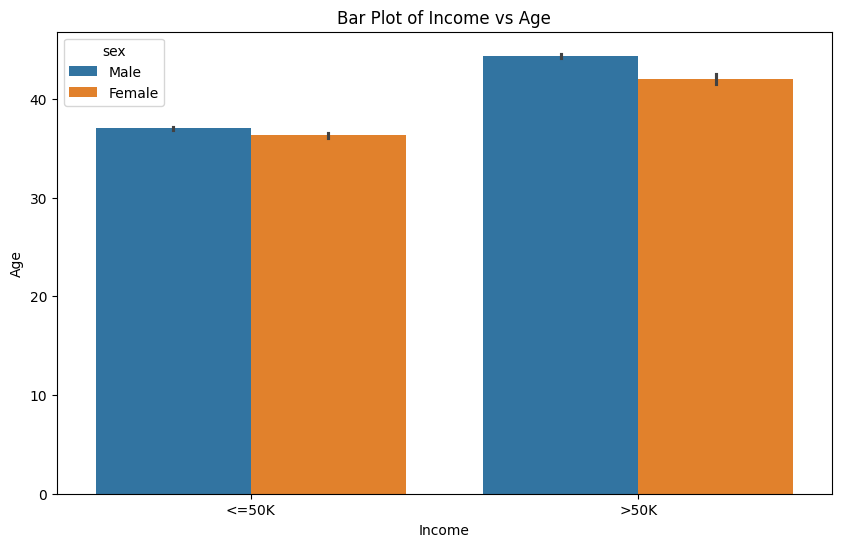

In [46]:

# Create a bar plot for 'age' and 'income' columns using seaborn
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.barplot(x='income', y='age', hue='sex', data=c_data)  # Create the bar plot with seaborn

# Set labels and title
plt.xlabel('Income')  # Set x-axis label
plt.ylabel('Age')  # Set y-axis label
plt.title('Bar Plot of Income vs Age')  # Set title

plt.show()  # Display the bar plot


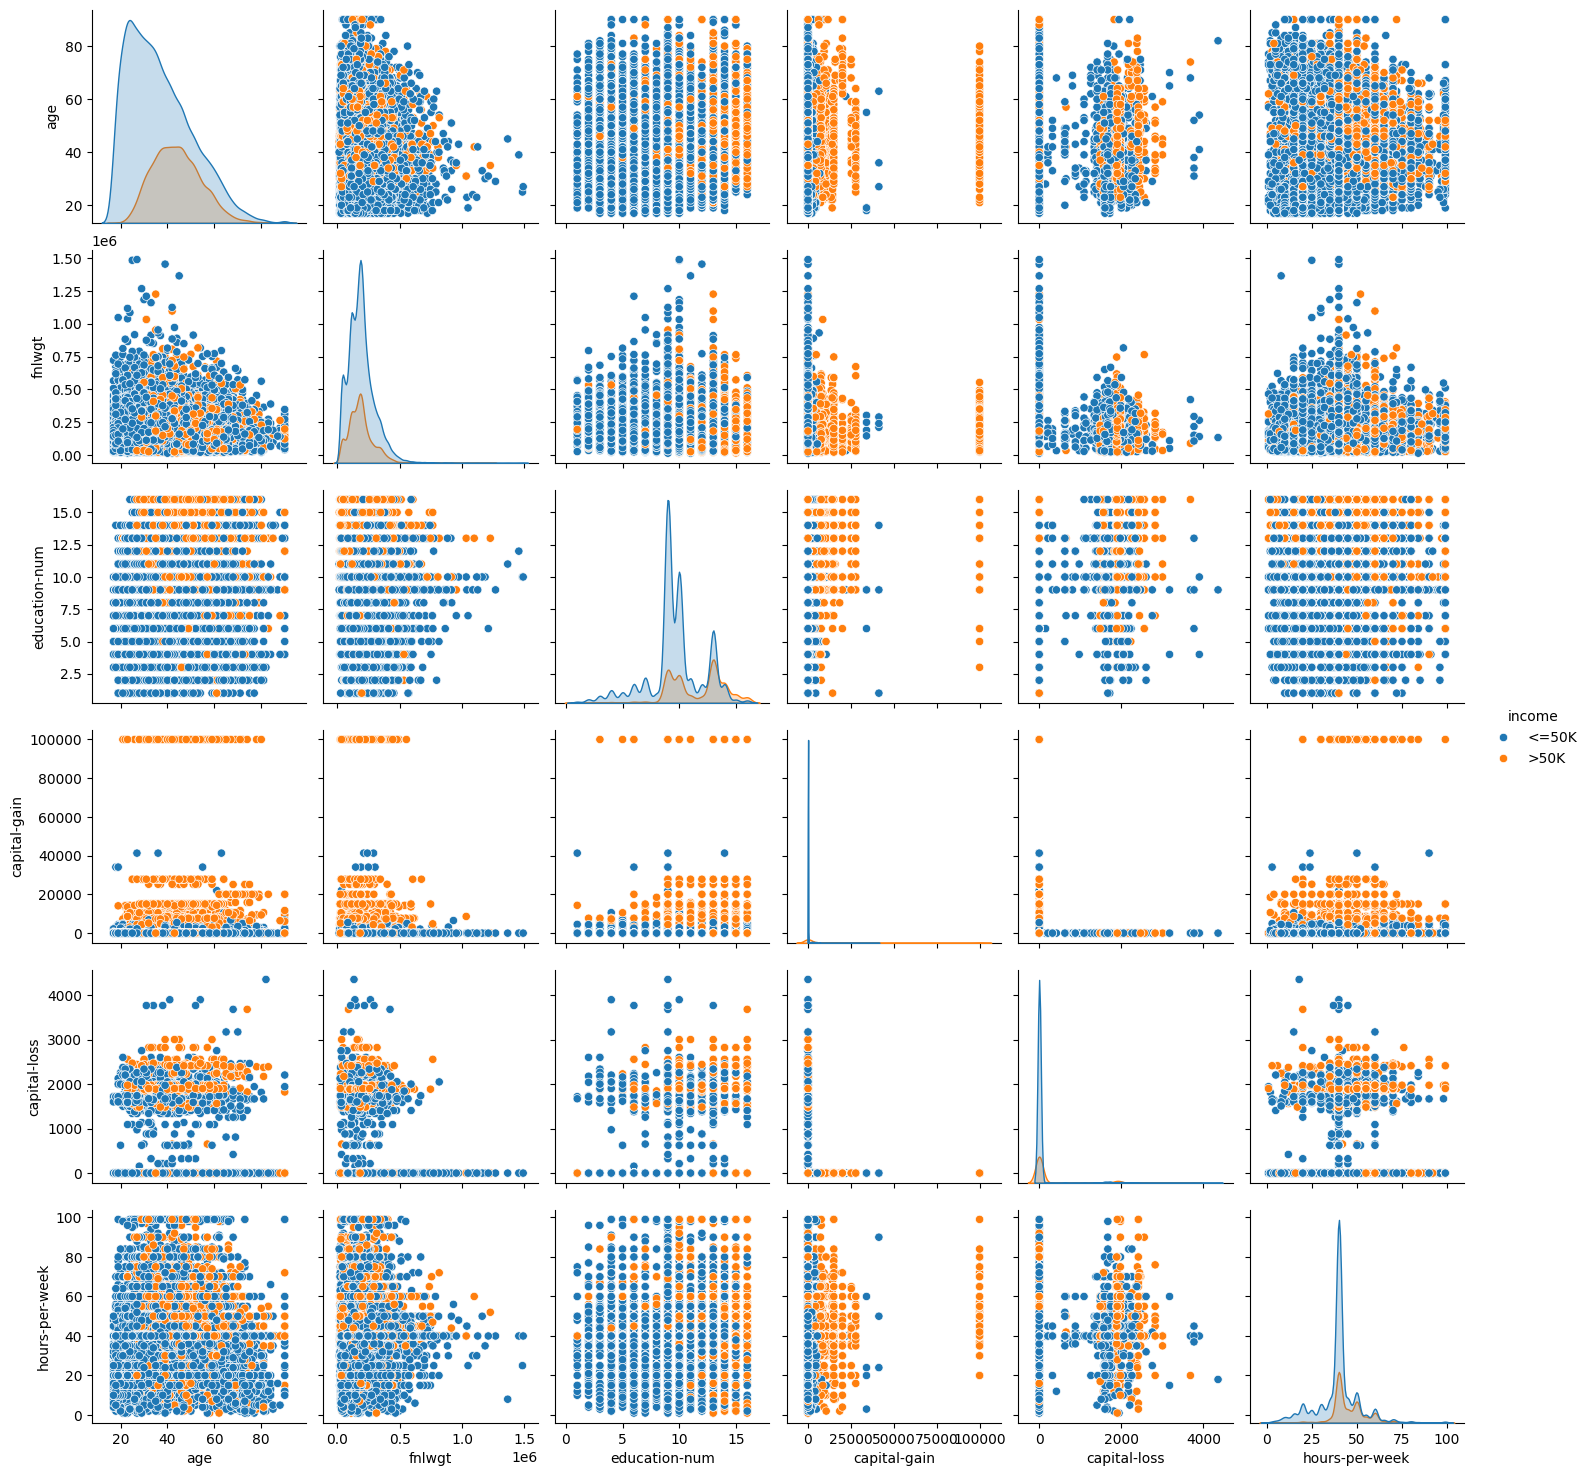

In [47]:
sns.pairplot(c_data, hue ='income')
plt.show()

Text(95.72222222222221, 0.5, 'Education Class')

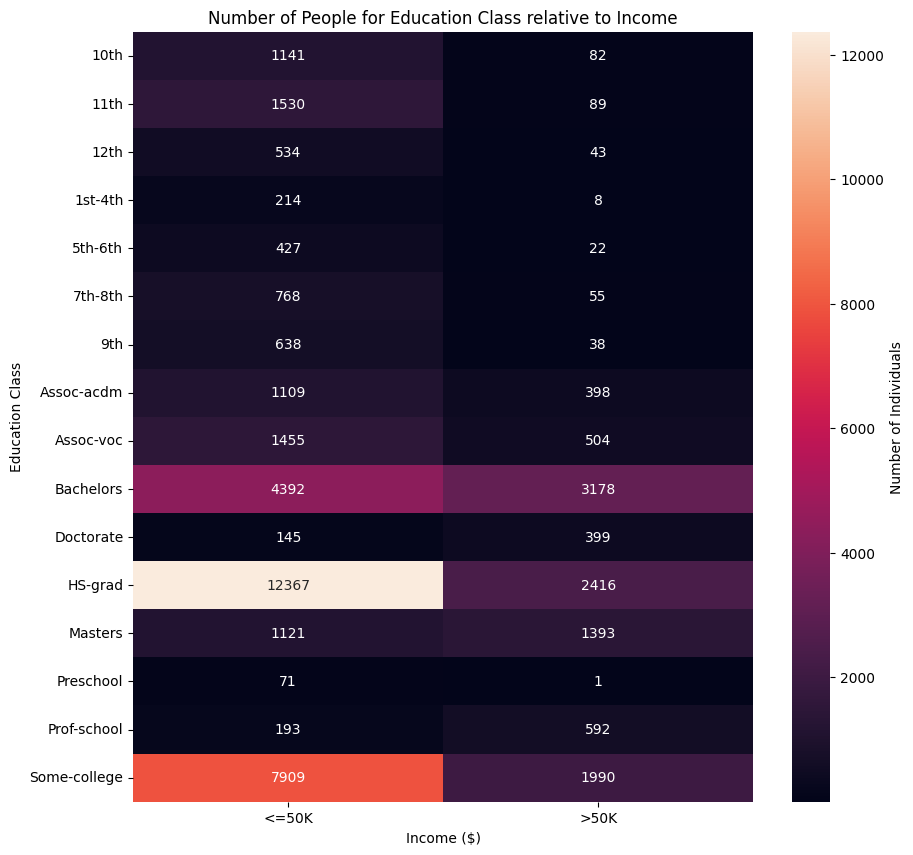

In [48]:
# Heat map
plt.figure(figsize=[10,10])
 
ct_counts = c_data.groupby(['education', 'income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'education', columns = 'income', values = 'count').fillna(0)

sns.heatmap(ct_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Number of People for Education Class relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Education Class')

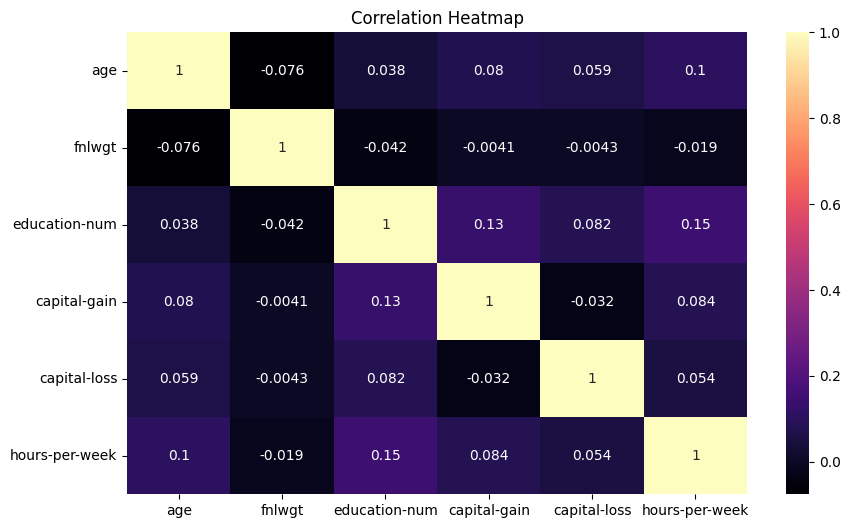

In [53]:
numeric_cols = c_data.select_dtypes(include=['number']).columns
numeric_data = c_data[numeric_cols]

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='magma')
plt.title('Correlation Heatmap')
plt.show()